In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.offsetbox as offsetbox

In [9]:
class VacuumCleaner():
    possible_actions = [-1, 0, 1]

    def __init__(self, rooms:int):
        self.rooms = rooms
        self.rooms_state = np.zeros((self.rooms,), dtype=int)
        self.location = random.randint(0, (rooms-1))
        self.clean = True

        self.reset_state()

    def reset_state(self):
        'This function makes some of your rooms dirty'
        self.rooms_state = np.random.randint(2, size=self.rooms, dtype=int)
        if any(self.rooms_state!=0):
            self.clean = False

        return (self.location, self.rooms_state)

    def step(self, action):

        '''
        This function takes actions - moves the vaccum and cleans.
        Please input the following as action:
        -1 to move left;
        0 to clean;
        1 to move right;
        '''

        reward = -1

        if action in VacuumCleaner.possible_actions:
            if action == -1:
                if self.location == 0:
                    print("You are in the first room, you can't move further left.")
                else:
                    self.location = self.location - 1
            elif action == 1:
                if self.location == self.rooms - 1:
                    print("You are in the last room, you can't move further right.")
                else:
                    self.location = self.location + 1
            else: # this is action == 0
                if  self.rooms_state[self.location] == 1: # cleans a dirty room
                    reward = reward + 1
                    self.rooms_state[self.location] = 0
                    if all(self.rooms_state==0):
                            self.clean = True
                else: # cleans a clean room
                    reward = reward - 1

        else:
            print("Your action is outside of possible actions, please choose from [-1, 0, 1].")


        return (self.location, self.rooms_state), reward, self.clean

    def render(self):
        'This function returns starting positions'

        arr_2d = np.expand_dims(self.rooms_state, axis=0)

        # plot
        plt.imshow(arr_2d, cmap='Greys', origin="upper")

        # frame
        for i in range(len(self.rooms_state)):
            rect = plt.Rectangle((i-0.499, -0.499), 1, 1, edgecolor="black", facecolor="none")
            plt.gca().add_patch(rect)

        # vacuum
        plt.scatter(self.location, 0, marker="*", color="lightpink", s=300)

        # room numetation
        for i in range(len(self.rooms_state)):
            plt.text(i, 0.8, str(i+1), ha='center', va='center', color='black')

        # legend
        legend_elements = [plt.Rectangle((0, 0), 1, 1, facecolor='white', edgecolor='black', label='Clean room'),
                           plt.Rectangle((0, 0), 1, 1, facecolor='black', edgecolor='black', label='Dirty room'),
                           plt.scatter([], [], marker='*', color='lightpink', s=100, label='Vacuum location')]
        plt.figlegend(handles=legend_elements, loc='center', bbox_to_anchor=(1.05, 0.5), borderaxespad=0.)

        plt.title('Vacuum location in rooms')
        plt.axis("off")

        return plt.show()




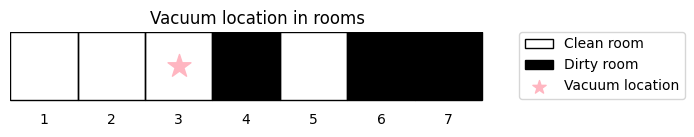

In [10]:
odkurzacz = VacuumCleaner(7)
odkurzacz.render()

In [11]:
all_moves = []

for i in range(1000):
  moves = 0

  odkurzacz = VacuumCleaner(4)

  while odkurzacz.clean == False:
    n = random.choice(VacuumCleaner.possible_actions)
    odkurzacz.step(n)
    moves += 1

  all_moves.append(moves)

You are in the first room, you can't move further left.
You are in the first room, you can't move further left.
You are in the last room, you can't move further right.
You are in the last room, you can't move further right.
You are in the last room, you can't move further right.
You are in the last room, you can't move further right.
You are in the last room, you can't move further right.
You are in the last room, you can't move further right.
You are in the last room, you can't move further right.
You are in the last room, you can't move further right.
You are in the last room, you can't move further right.
You are in the last room, you can't move further right.
You are in the last room, you can't move further right.
You are in the last room, you can't move further right.
You are in the last room, you can't move further right.
You are in the first room, you can't move further left.
You are in the first room, you can't move further left.
You are in the first room, you can't move furthe

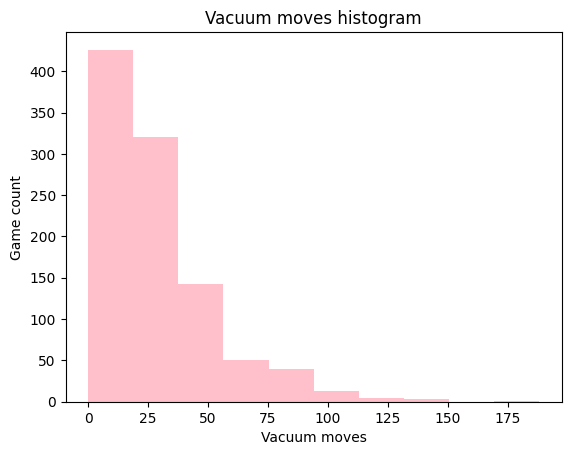

In [12]:
# plot the histogram of moves
plt.hist(all_moves, bins=10, histtype='stepfilled', color='pink')

plt.title('Vacuum moves histogram')
plt.xlabel('Vacuum moves')
plt.ylabel('Game count')

ax = plt.gca()

plt.show()


In [13]:
def code_state(state):
    vacuum_pos, dirt_pos = state
    n = len(dirt_pos)
    return vacuum_pos * (2 ** n) + sum([2** ind for ind, brud in enumerate(dirt_pos) if brud == 1])


Q = np.random.randint((4*2**4, len(VacuumCleaner.possible_actions)))


num_episodes = 1000
exploration_rate = 0.1

for episode in range(num_episodes):
  state = odkurzacz.location, odkurzacz.rooms_state

  while not odkurzacz.clean:
      if random.uniform(0, 1) < exploration_rate:
          action = random.choice(VacuumCleaner.possible_actions)
      else:
          action = np.argmax(Q[code_state(state), :]) - 1


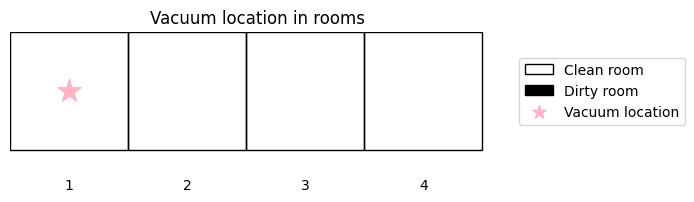

In [14]:
odkurzacz.render()